In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import nest
import numpy as np
import itertools
import pickle
from time import time
from random import shuffle
from pynestml.frontend.pynestml_frontend import generate_nest_target
from basalganglia import BasalGanglia
from experiment import ExperimentDA
from bg_params import params

NEST_SIMULATOR_INSTALL_LOCATION = nest.ll_api.sli_func("statusdict/prefix ::")

new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.3
 Built: Apr  5 2022 17:48:08

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
generate_nest_target(input_path="nest_module/msn.nestml",
                target_path="nest_module/nestml_target")

generate_nest_target(input_path="nest_module/snr.nestml",
                target_path="nest_module/snr_target", module_name="snrmodule")

# generate_nest_target(input_path="nest_module/gpe.nestml",
#                 target_path="nest_module/gpe_target", module_name="gpemodule")




              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.3
 Built: Apr  5 2022 17:48:08

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.

-- The CXX compiler identification is AppleClang 14.0.0.14000029
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/clang++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done

-------------------------------------------------------
nestmlmodule Configuration Summary
-------------------------------------------------------

C++ compiler         : /usr/bin/clang++
Build static libs    : OFF
C++ compiler flags   : 
NEST compiler flags  :  -O2 -std=c++11 -Wall -Xclang -fopenmp  -O3 -DNDEBUG
NEST include dirs    :  -I/opt/homebrew/Cellar/nest/3.3_1/include/nest -I/o

In [3]:
nest.Install("snrmodule")
nest.Install("nestmlmodule")
# nest.Install("gpemodule")


Jan 10 13:51:21 Install [Info]: 
    loaded module snrmodule

Jan 10 13:51:21 Install [Info]: 
    loaded module nestmlmodule


In [4]:
# t = int(time())
# restart_kernel(t, t+1)

bg = BasalGanglia(curr=0)
    
# Running example

e_normal = ExperimentDA(dopamine_level=0.3, bg=bg)
e_normal.run()


Jan 04 10:40:59 NodeManager::prepare_nodes [Info]: 
    Preparing 10611 nodes for simulation.

Jan 04 10:40:59 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 10611
    Simulation time (ms): 1500
    Number of OpenMP threads: 1
    Not using MPI

Jan 04 10:41:36 SimulationManager::run [Info]: 
    Simulation finished.

Jan 04 10:41:36 NodeManager::prepare_nodes [Info]: 
    Preparing 10611 nodes for simulation.

Jan 04 10:41:36 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 10611
    Simulation time (ms): 1
    Number of OpenMP threads: 1
    Not using MPI

Jan 04 10:41:36 SimulationManager::run [Info]: 
    Simulation finished.

Jan 04 10:41:36 NodeManager::prepare_nodes [Info]: 
    Preparing 10611 nodes for simulation.

Jan 04 10:41:36 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 10611
    Simulation time (ms): 1
    Number of OpenMP threads: 1
    Not using MPI

Jan 04 10:41:36 SimulationManager::run [Info]: 

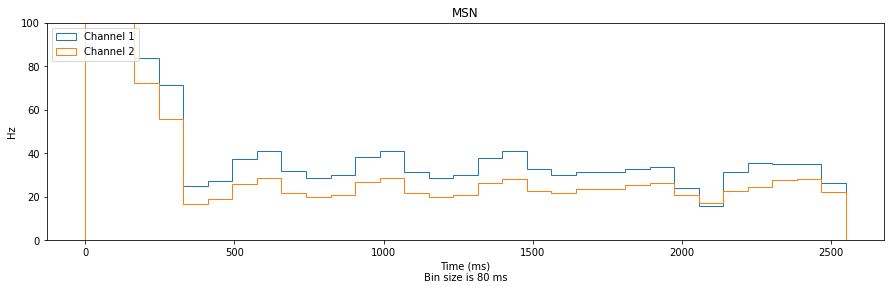

In [5]:
# Plotting results with stdp

e = e_normal
plt.rcParams['figure.figsize'] = [15.0, 4.0]
channels = [0,1]
plt.rcParams['font.size'] = 15
e.bg.plot_activity('msn', channels=channels, time_bin=80, y_range=(0,100)); plt.title('MSN')
plt.savefig('MSN_healthy.png',bbox_inches="tight")

In [6]:
nest.GetDefaults('stdp_dopamine_synapse')

{'A_minus': 1.5,
 'A_plus': 1.0,
 'b': 0.0,
 'c': 0.0,
 'delay': 1.0,
 'has_delay': True,
 'n': 0.0,
 'num_connections': 0,
 'receptor_type': 0,
 'requires_symmetric': False,
 'synapse_model': 'stdp_dopamine_synapse',
 'synapse_modelid': 30,
 'tau_c': 1000.0,
 'tau_n': 200.0,
 'tau_plus': 20.0,
 'vt': -1,
 'Wmax': 200.0,
 'Wmin': 0.0,
 'weight': 1.0,
 'weight_recorder': ()}

Text(0.5, 1.0, 'SNR')

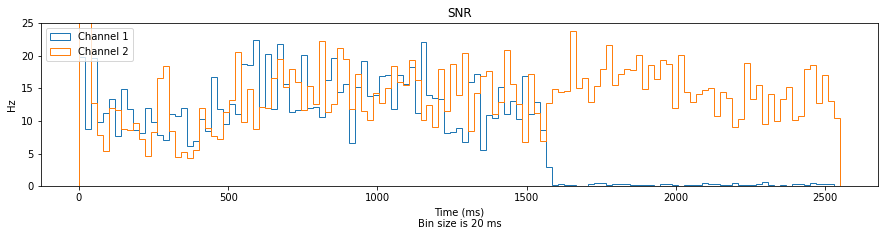

In [9]:
# Plotting results without GPe, with lateral inhibition, C 172.1, current 690, th 9.8 with STN efferents and GPe inhibition
#just stn

e = e_normal_5
plt.rcParams['figure.figsize'] = [15.0, 4.0]
channels = [0,1]
plt.rcParams['font.size'] = 15
e.msn.plot_activity('snr', channels=channels, time_bin=20, y_range=(0,25)); plt.title('SNR')

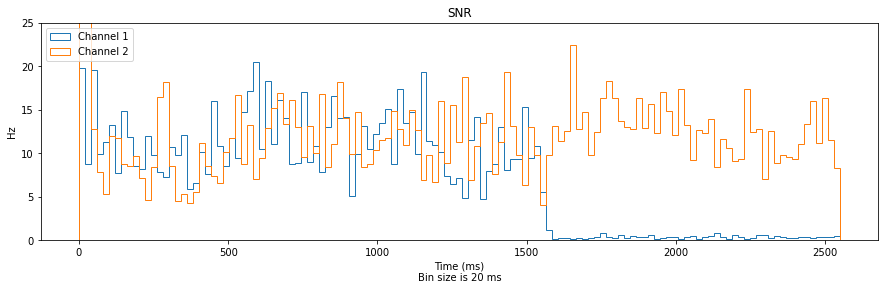

In [8]:
# low dopamine
#just stn

e = e_normal_2
plt.rcParams['figure.figsize'] = [15.0, 4.0]
channels = [0,1]
plt.rcParams['font.size'] = 15
e.msn.plot_activity('snr', channels=channels, time_bin=20, y_range=(0,25)); plt.title('SNR')
plt.savefig('plots/SNr_low_dopamine.png',bbox_inches="tight")

In [4]:
def rasterplot(
    ax, nucleus_name='msn', channels=0, n_neurons=40, time_bin=50.0, time_axis=True, 
    alpha_spike=0.2, alpha_background=0.125
):
    ax1 = ax
#     ax1.set_title(nucleus_name)
    ax1.set_ylabel(nucleus_name)
    nucleus_name = nucleus_name.lower()

    if type(channels) is not list:
        channels = [channels]
    
    spikes = []
    for i, channel in enumerate(channels):
        # Set background
        ax1.axhspan(i*n_neurons, (i+1)*n_neurons, facecolor=new_colors[i], alpha=alpha_background)
        
        # Plot events        
        detector = bg.__getattribute__('spikedetector_' + nucleus_name + '_channels')[channel]
        senders = nest.GetStatus(detector)[0]['events']['senders']
        times = nest.GetStatus(detector)[0]['events']['times']

        spikes_dict = {sender: [] for sender in senders}
        for sender,time in zip(senders,times):
            spikes_dict[sender].append(time)
        spikes_list = list(spikes_dict.values())
        shuffle(spikes_list)
        spikes += spikes_list[:n_neurons]
    ax1.set_yticks([])
#     ax1.eventplot(spikes, colors='black', alpha=0.4)
    for i, t in enumerate(spikes):
        ax1.plot(t, [i]*len(t), 'o', markersize=1, color='black', alpha=alpha_spike)
    ax1.set_xlim(0,2550)
    ax1.tick_params(labelsize=plt.rcParams['font.size']*0.75)
    if not time_axis: ax1.set_xticks([])
    
    
    ax2 = ax1.twinx()
    for i, channel in enumerate(channels):
        detector = bg.__getattribute__('spikedetector_' + nucleus_name + '_channels')[channel]
        senders = nest.GetStatus(detector)[0]['events']['senders']
        times = nest.GetStatus(detector)[0]['events']['times']

        n_senders = len(set(senders))
        n_bins = int( (max(times)-min(times)) / time_bin)
        
        ax2.hist(
            times,
            bins = n_bins, 
            histtype = 'step', 
            weights = np.ones_like(times) / (n_senders * (time_bin / 1000.0)),
            label = 'ch{}'.format(i),
            linewidth = 2.0,
        )
        ax2.tick_params(labelsize=plt.rcParams['font.size']*0.75)
    
    ax2.axvline(x=1500, linestyle='--', color=new_colors[2])

    
def plot_input_from_cortex(ax):
    time_values = np.linspace(0,2550,num=2550)
    y1 = np.ones_like(time_values)
    y2 = np.ones_like(time_values)
    y1 *= 5
    y2 *= 5
    for i in range(25):
        y1[1500+i] += (i)*2e-2
        y1[1525+i] += (25+i)*2e-2
        y2[1500+i] += (i)*2e-2
        y2[1525+i] += (25-i)*2e-2
    y1[1550:] = 6.0

    ax.plot(time_values, y1)
    ax.plot(time_values, y2)
    ax.set_xlim(0,2550)
    ax.set_ylabel('Ctx')
    ax.yaxis.set_ticks([5, 6])
    ax.yaxis.set_ticks_position('right')
    ax.xaxis.set_ticks([])
    ax.tick_params(labelsize=plt.rcParams['font.size']*0.75)
    ax.axvline(x=1500, linestyle='--', color=new_colors[2])

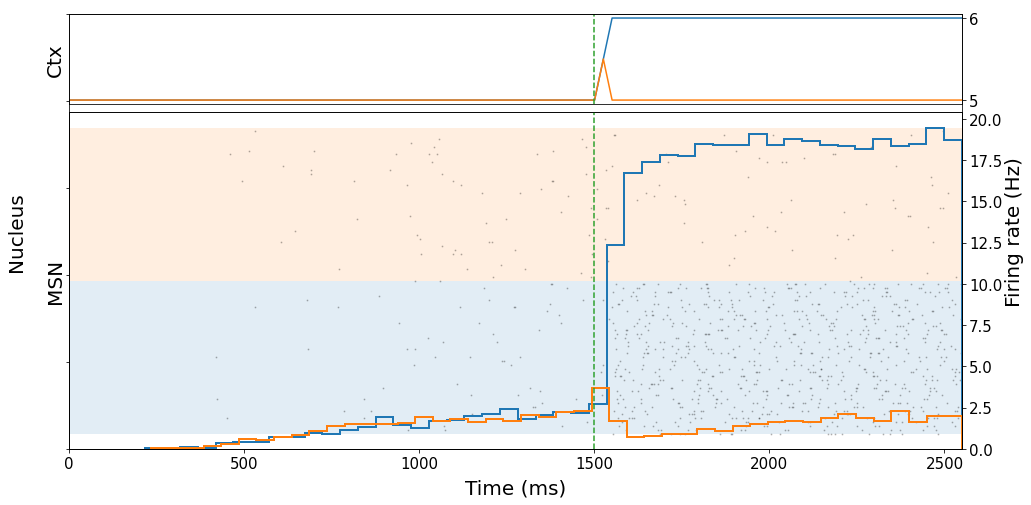

In [6]:
plt.rcParams['figure.figsize'] = [16.0, 8.0]#[6.0, 8.0]
plt.rcParams['font.size'] = 20

fig = plt.figure()
ax_ctx = plt.subplot2grid((9,1), (0,0), rowspan=2)
ax_msn = plt.subplot2grid((9,1), (2,0), rowspan=7)


plot_input_from_cortex(ax_ctx)

rasterplot(ax_msn, 'MSN', channels=[0,1])

ax1 = fig.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Nucleus')

ax2 = ax1.twinx()
ax2.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax2.set_ylabel('Firing rate (Hz)')
ax2.yaxis.set_label_position('right')

# plt.tight_layout()
plt.legend(loc='upper left')

plt.savefig("general_behaviour.svg")
plt.savefig("general_behaviour.png", dpi=300, transparent=True)

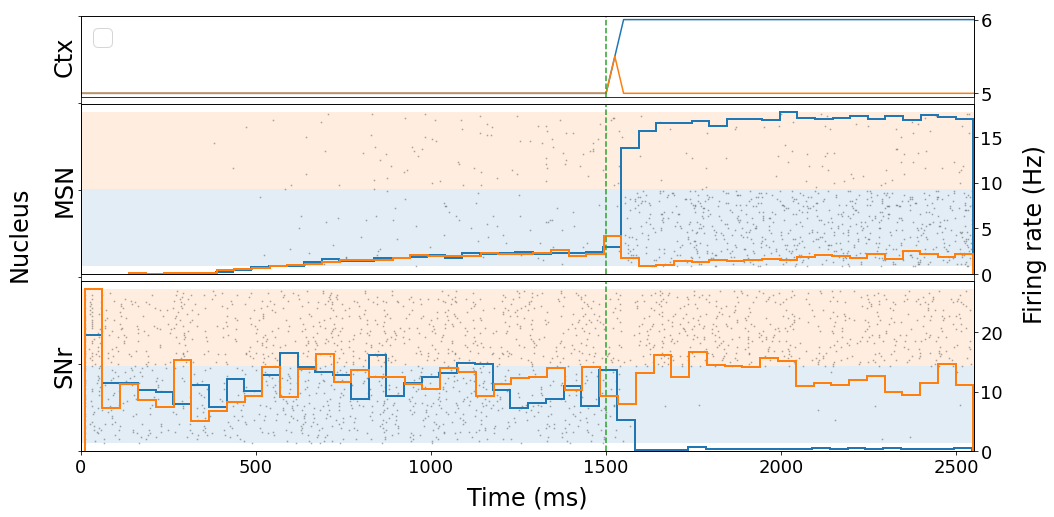

In [12]:
plt.rcParams['figure.figsize'] = [16.0, 8.0]#[6.0, 8.0]
plt.rcParams['font.size'] = 24

fig = plt.figure()
ax_ctx = plt.subplot2grid((10,1), (0,0), rowspan=2)
ax_msn = plt.subplot2grid((10,1), (2,0), rowspan=4)
ax_snr = plt.subplot2grid((10,1), (6,0), rowspan=4)


plot_input_from_cortex(ax_ctx)

rasterplot(ax_msn, 'MSN', channels=[0,1], time_axis=False)
rasterplot(ax_snr, 'SNr', channels=[0,1])

ax1 = fig.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Nucleus')

ax2 = ax1.twinx()
ax2.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax2.set_ylabel('Firing rate (Hz)')
ax2.yaxis.set_label_position('right')

# plt.tight_layout()
plt.legend(loc='upper left')

plt.savefig("plots/results_low_dopamine.png")
# plt.savefig("general_behaviour.png", dpi=300, transparent=True)

### Testing STDP synapses

In [5]:
from msn_params import params
plt.rcParams['figure.figsize'] = [8.0, 5.0]
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['grid.color'] = 'k'
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['font.size'] = 10
def run_network(pre_spike_time, post_spike_time, vt_spike_times,
                neuron_model_name,
                synapse_model_name,
                A_vt,
                dop,
                resolution=.1, # [ms]
                delay=1., # [ms]
                lmbda=1E-6,
                sim_time=None,  # if None, computed from pre and post spike times
                synapse_parameters=None,  # optional dictionary passed to the synapse
                fname_snip="",
                debug=False):

    #nest.set_verbosity("M_WARNING")
    nest.set_verbosity("M_ALL")

    nest.ResetKernel()
    nest.SetKernelStatus({'resolution': resolution})

    # create spike_generators with these times
    pre_sg = nest.Create("spike_generator",
                         params={"spike_times": [pre_spike_time]})
    post_sg = nest.Create("spike_generator",
                          params={"spike_times": [post_spike_time]})
    vt_sg = nest.Create("spike_generator",
                            params={"spike_times": vt_spike_times})

    # create  volume transmitter
    vt = nest.Create("volume_transmitter")
    vt_parrot = nest.Create("parrot_neuron")
    nest.Connect(vt_sg, vt_parrot)
    nest.Connect(vt_parrot, vt, syn_spec={"synapse_model": "static_synapse",
                                          "weight": 1.,
                                          "delay": 1.})   # delay is ignored!
    vt_gid = vt.get("global_id")

    # set up custom synapse models
    wr = nest.Create('weight_recorder')
    nest.CopyModel(synapse_model_name, "stdp_nestml_rec",
                {"weight_recorder": wr[0],
                 "delay": delay,
                 "receptor_type": 2,
                 "vt": vt_gid,
                 "A_plus": 1,
                #  "tau_plus": 10.,
                })

    # create parrot neurons and connect spike_generators
    pre_neuron = nest.Create("parrot_neuron")
    post_neuron = nest.Create(neuron_model_name)
    nest.SetStatus(post_neuron, params.neuron.msn_d1)
    nest.SetStatus(post_neuron, {'y1':dop, 'y2':dop})


    spikedet_pre = nest.Create("spike_recorder")
    spikedet_post = nest.Create("spike_recorder")
    spikedet_vt = nest.Create("spike_recorder")


    nest.Connect(pre_sg, pre_neuron, "one_to_one", syn_spec={"delay": 1.})
    nest.Connect(post_sg, post_neuron, "one_to_one", syn_spec={"delay": 1., "weight": 9999., 'receptor_type': 1})
    nest.Connect(post_sg, post_neuron, "one_to_one", syn_spec={"delay": 1., "weight": 9999., 'receptor_type': 2})
    nest.Connect(post_sg, post_neuron, "one_to_one", syn_spec={"delay": 1., "weight": 9999., 'receptor_type': 3})
    nest.Connect(pre_neuron, post_neuron, "all_to_all", syn_spec={'synapse_model': 'stdp_nestml_rec', 'receptor_type': 1})
    nest.Connect(pre_neuron, post_neuron, "all_to_all", syn_spec={'synapse_model': 'stdp_nestml_rec', 'receptor_type': 2})
    nest.Connect(pre_neuron, post_neuron, "all_to_all", syn_spec={'synapse_model': 'stdp_nestml_rec', 'receptor_type': 3})


    nest.Connect(pre_neuron, spikedet_pre)
    nest.Connect(post_neuron, spikedet_post)
    # nest.Connect(post_sg, spikedet_post)
    nest.Connect(vt_parrot, spikedet_vt)

    # get STDP synapse and weight before protocol
    syn = nest.GetConnections(source=pre_neuron, synapse_model="stdp_nestml_rec")
    if synapse_parameters is None:
        synapse_parameters = {}
    # print(type('stdp_nestml_rec'))
    # nest.SetStatus(stdp_nestml_rec, {"A_plus": 1})
    # nest.SetStatus(syn, {'n': 1})
    ## can't set on stdp_nestml_rec or stdp_dopamine_synapse because they're a string, can't set on syn because it's an individual synapse and I need to be setting it for all synapses

    initial_weight = nest.GetStatus(syn)[0]["weight"]
    # np.testing.assert_allclose(initial_weight, 1)
    # print(nest.GetStatus(syn))
    nest.Simulate(sim_time)
    updated_weight = nest.GetStatus(syn)[0]["weight"]

    # actual_t_pre_sp = nest.GetStatus(spikedet_pre)[0]["events"]["times"][0]
    # actual_t_post_sp = nest.GetStatus(spikedet_post)[0]["events"]["times"][0]
    # plot_raster(spikedet_post)

    # pre_spike_times_ = nest.GetStatus(spikedet_pre, "events")[0]["times"]
    # assert len(pre_spike_times_) == 1 and pre_spike_times_[0] > 0

    # post_spike_times_ = nest.GetStatus(spikedet_post, "events")[0]["times"]
    # assert len(post_spike_times_) == 1 and post_spike_times_[0] > 0

    # vt_spike_times_ = nest.GetStatus(spikedet_vt, "events")[0]["times"]
    # assert len(vt_spike_times_) == 1 and vt_spike_times_[0] > 0

    # dt = actual_t_post_sp - actual_t_pre_sp
    dt = 0.
    dw = updated_weight

    return dt, dw

In [6]:
def run_vt_spike_timing_experiment(neuron_model_name, synapse_model_name, A_vt, dop, synapse_parameters=None):
    sim_time = 10000.    # [ms] -- make sure to simulate for much longer than the eligibility trace
                         #         time constant, which is typically the slowest time constant in
                         #         the system, PLUS the time of the latest vt spike
    pre_spike_time = 1.  # [ms]
    post_spike_time = 3. # [ms]
    delay = .5           # dendritic delay [ms]

    dt_vec = []
    dw_vec = []
    for vt_spike_time in np.round(np.linspace(4, 5000, 12)).astype(float):  # sim_time - 10 * delay
        dt, dw = run_network(pre_spike_time, post_spike_time, [vt_spike_time],
                          neuron_model_name,
                          synapse_model_name,
                          A_vt,
                          dop,
                          delay=delay, # [ms]
                          synapse_parameters=synapse_parameters,
                          sim_time=sim_time,
                        )
        dt_vec.append(vt_spike_time)
        dw_vec.append(dw)

    return dt_vec, dw_vec, delay


Jan 10 14:06:28 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 0.1 ms.

Jan 10 14:06:28 NodeManager::prepare_nodes [Info]: 
    Preparing 11 nodes for simulation.

Jan 10 14:06:28 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 11
    Simulation time (ms): 10000
    Number of OpenMP threads: 1
    Not using MPI

Jan 10 14:06:28 SimulationManager::run [Info]: 
    Simulation finished.

Jan 10 14:06:28 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 0.1 ms.

Jan 10 14:06:28 NodeManager::prepare_nodes [Info]: 
    Preparing 11 nodes for simulation.

Jan 10 14:06:28 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 11
    Simulation time (ms): 10000
    Number of OpenMP threads: 1
    Not using MPI

Jan 10 14:06:28 SimulationManager::run [Info]: 
    Simulation finished.

Jan 10 14:06:28 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 0.1 ms

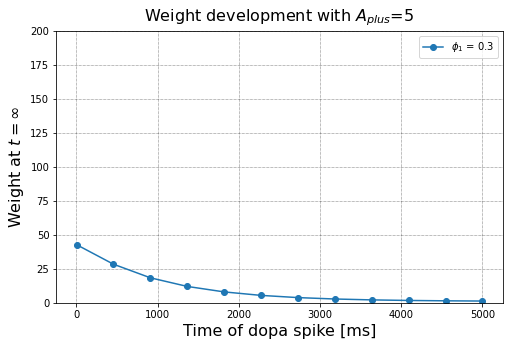

In [10]:


fig, ax = plt.subplots()
for dop in [0.3]:
    A_plus = 10.0
    dt_vec, dw_vec, delay = run_vt_spike_timing_experiment('msn',
                                                       'stdp_dopamine_synapse',
                                                       A_plus,
                                                       dop,
                                                       synapse_parameters={"A_plus": A_plus})
    ax.plot(dt_vec, dw_vec, marker='o', label="$\phi_1$ = " + str(dop))

plt.xlabel("Time of dopa spike [ms]", fontsize=16)
plt.ylabel("Weight at $t = \infty$",fontsize=16)
# plt.title('Weight development with $A_{plus}$=1', fontsize=16)
ax.set_title('Weight development with $A_{plus}$=5', size=16, pad=10)
# ax.set_xlabel("Time of dopa spike [ms]")
# ax.set_ylabel("Weight at $t = \infty$")
ax.legend()
plt.ylim([0,200])
plt.savefig("plots/new_weight_development_aplus1.png")

In [4]:
# Labels for x and y axes for traces used in plotting functions
labels = {"c": {"x_label": "Times [ms]", "y_label": "Eligibility \ntrace (c)"},
          "weight": {"x_label": "Times [ms]", "y_label": "Weight \ntrace (w)"},
          "n": {"x_label": "Times [ms]", "y_label": "Dopamine \ntrace (n)"}
         }

In [5]:
# Plot trace values for a neurons or set of neurons
def plot_traces_for_neuron(log, recordables, neuron_numbers=None, pos_dopa_spike_times=None, neg_dopa_spike_times=None):
    """
    Plots the trace values for the given list of neuron IDs
    """
    times = log["t"]
    trace_values = {}
    # Initialize the list if "neuron_numbers" is None, which corresponds to all neurons
    if neuron_numbers is None:
        neuron_numbers = np.array([i+1 for i in range(30)])

    # The actual neuron numbers are -1 of the given numbers
    neuron_numbers_actual = np.array(neuron_numbers) - 1

    # Get the values of recordables for the given neuron IDs
    for recordable in recordables:
        trace_values[recordable] = np.array(log[recordable])[:, neuron_numbers_actual]

    n_neurons = len(neuron_numbers)
    palette = plt.get_cmap('tab10')

    k = 1
    for i in range(0, n_neurons, 3):
            fig, ax = plt.subplots(nrows=len(recordables), sharex=True, squeeze=False)
            ax = ax.flatten()
            fig.suptitle("Trace values for Neuron " + str(k))
            for j, recordable in enumerate(recordables):
                ax[j].plot(times, trace_values[recordable][:, i], label="neuron " + str(k), color=palette(neuron_numbers_actual[k-1]))
                ax[j].set_xlim(xmin=0)
                ax[j].set_ylabel(labels[recordable]["y_label"], rotation=0, ha="right", va="center")
                ax[j].legend(loc="upper right", labelspacing=0.)
                if pos_dopa_spike_times is not None:
                    ax[j].scatter(pos_dopa_spike_times, np.ones_like(pos_dopa_spike_times) * np.amin(trace_values[recordable][:, i]), marker="^", c="green", s=20)
                if neg_dopa_spike_times is not None:
                    ax[j].scatter(neg_dopa_spike_times, np.ones_like(neg_dopa_spike_times) * np.amin(trace_values[recordable][:, i]), marker="^", c="red", s=20)
            fig.tight_layout(rect=[0, 0.03, 1, 0.95])
            # plt.savefig(f"plots/traces_low_neuron{k-1}.png")
            k+=1

In [6]:
# plt.savefig(f"plots/traces_low_neuron{i}.png")
def plot_spiking_activity(neuron_spike_times, pos_dopa_spike_times, neg_dopa_spike_times, source_ids, total_t_sim):
    fig, ax = plt.subplots()
    palette = plt.get_cmap('tab10')

    n_neurons = len(neuron_spike_times)
    y_ticks = [i * 10 for i in range(n_neurons, 0, -1)]
    for i in range(n_neurons):
        ax.scatter(neuron_spike_times[i], np.ones_like(neuron_spike_times[i]) * y_ticks[i], color=palette(i), s=1)

    if pos_dopa_spike_times is not None:
        ax.scatter(pos_dopa_spike_times, np.zeros_like(pos_dopa_spike_times), marker="^", c="green", s=100)
    if neg_dopa_spike_times is not None:
        ax.scatter(neg_dopa_spike_times, np.zeros_like(pos_dopa_spike_times), marker="^", c="red", s=100)

    ax.set_xlim(0., total_t_sim)
    ax.set_ylim(ymin=0)
    ax.set_xlim(xmin=0)
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(source_ids)
    ax.set_xlabel("Time [ms]")
    ax.set_ylabel("Neuron ID")
    plt.tight_layout()
    fig.show()

In [7]:
# simulation parameters
resolution = .1

# network parameters
n_neurons = 10
tau_n = 120.
tau_c = 100.
pre_poisson_rate = 18  # [s^-1]
initial_weight = 5.6  # controls initial firing rate before potentiation

# stimulus parameters
pos_dopa_spike_times = [2000, 3000, 4000]
neg_dopa_spike_times = [8000, 9000, 10000]
A_vt = [10., -10.]


nest.set_verbosity("M_ALL")

nest.ResetKernel()
nest.SetKernelStatus({'resolution': resolution})

# Create the neurons
neurons = nest.Create('msn', n_neurons)
nest.SetStatus(neurons, params.neuron.msn_d1)

# Create a poisson generator
poisson_gen = nest.Create("poisson_generator", n_neurons, params={"rate": pre_poisson_rate})
parrot_neurons = nest.Create("parrot_neuron", n_neurons)

# Spike generators
vt_sg = nest.Create("spike_generator", params={"spike_times": pos_dopa_spike_times + neg_dopa_spike_times})

# Spike recorder
spike_rec = nest.Create("spike_recorder")
spike_rec_vt = nest.Create("spike_recorder")
spike_re_pt = nest.Create("spike_recorder")

# create  volume transmitter
vt = nest.Create("volume_transmitter")
vt_parrot = nest.Create("parrot_neuron")
nest.Connect(vt_sg, vt_parrot, syn_spec={"weight": -1.})
nest.Connect(vt_parrot, vt, syn_spec={"synapse_model": "static_synapse",
                                      "weight": 1.,
                                      "delay": 1.})

vt_gid = vt.get("global_id")

# multimeters
mms = [nest.Create("multimeter", params= {"record_from": ["V_m"]}) for _ in range(n_neurons)]

# set up custom synapse models
wr = nest.Create('weight_recorder')
nest.CopyModel('stdp_dopamine_synapse', "stdp_nestml_rec",
            {"weight_recorder": wr[0],
             "weight": initial_weight,
             "delay": 0.5,
             "receptor_type": 0,
             "vt": vt_gid,
             "Wmin":-100,
             "tau_n": tau_n,
             "tau_c": tau_c,
            })

# Connect everything
nest.Connect(poisson_gen, parrot_neurons, "one_to_one")
nest.Connect(parrot_neurons, neurons, "one_to_one", syn_spec={'synapse_model': 'stdp_nestml_rec', 'receptor_type': 1})
nest.Connect(parrot_neurons, neurons, "one_to_one", syn_spec={'synapse_model': 'stdp_nestml_rec', 'receptor_type': 2})
nest.Connect(parrot_neurons, neurons, "one_to_one", syn_spec={'synapse_model': 'stdp_nestml_rec', 'receptor_type': 3})

nest.Connect(neurons, spike_rec)
nest.Connect(vt_parrot, spike_rec_vt)

for i in range(n_neurons):
    nest.Connect(mms[i], neurons[i])


Jan 01 15:39:19 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 0.1 ms.


In [8]:
def run_simulation_in_chunks(sim_chunks, sim_time, recordables, neurons):
    sim_time_per_chunk = sim_time / sim_chunks

    # Init log to collect the values of all recordables
    log = {}
    log["t"] = []

    # Initialize all the arrays
    # Additional one entry is to store the trace value before the simulation begins
    for rec in recordables:
        log[rec] = (sim_chunks + 1) * [[]]

    # Get the value of trace values before the simulation
    syn = nest.GetConnections(target=neurons, synapse_model="stdp_nestml_rec")
    # print('rec', nest.GetStatus(syn))
    for rec in recordables:
        log[rec][0] = syn.get(rec)

    log["t"].append(nest.GetKernelStatus("biological_time"))

    # Run the simulation in chunks
    nest.Prepare()
    for i in range(sim_chunks):
        # Set the reward / punishment for dopa spikes
        # Set the punishment signal only when the timed during simulation == the first negative dopa spike time
        # Otherwise set the reward signal
        sim_start_time = i * sim_time_per_chunk
        sim_end_time = sim_start_time + sim_time_per_chunk

        if sim_end_time > neg_dopa_spike_times[0]:
            nest.SetDefaults('stdp_nestml_rec', {'A_plus':-1})
            # syn.set({"A_plus": 10})
        else:
            # syn.set({"A_minus": -10})
            nest.SetDefaults('stdp_nestml_rec', {'A_plus':1})

        nest.Run(sim_time//sim_chunks)

        # log current values
        log["t"].append(nest.GetKernelStatus("biological_time"))

        # Get the value of trace after the simulation
        for rec in recordables:
            log[rec][i + 1] = syn.get(rec)
            # if rec=='n':
            #     print('n', syn.get(rec))
    nest.Cleanup()

    return log

In [9]:
# Run simulation
sim_time = 12000
n_chunks = 400
recordables = ["c", "n", "weight"]
log = run_simulation_in_chunks(n_chunks, sim_time, recordables, neurons)

times = spike_rec.get("events")["times"]
senders = spike_rec.get("events")["senders"]

times_vt = spike_rec_vt.get("events")["times"]

connections = nest.GetConnections(neurons)
source_ids = connections.get("source")  # source IDs of all neurons
source_ids = list(set(source_ids))

neuron_spike_times = [[] for _ in range(n_neurons)]
for i in range(n_neurons):
    neuron_spike_times[i] = times[senders == source_ids[i]]


Jan 01 15:39:23 NodeManager::prepare_nodes [Info]: 
    Preparing 47 nodes for simulation.

Jan 01 15:39:23 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 47
    Simulation time (ms): 30
    Number of OpenMP threads: 1
    Not using MPI

Jan 01 15:39:23 SimulationManager::run [Info]: 
    Simulation finished.

Jan 01 15:39:23 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 47
    Simulation time (ms): 30
    Number of OpenMP threads: 1
    Not using MPI

Jan 01 15:39:23 SimulationManager::run [Info]: 
    Simulation finished.

Jan 01 15:39:23 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 47
    Simulation time (ms): 30
    Number of OpenMP threads: 1
    Not using MPI

Jan 01 15:39:23 SimulationManager::run [Info]: 
    Simulation finished.

Jan 01 15:39:23 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 47
    Simulation time (ms): 30
    Number of OpenMP threads: 1
    Not using MPI

Jan 0

/var/folders/ld/jprl9p6919z406cl1fwvkt_40000gn/T/ipykernel_22967/3196756057.py:24: UserWarning:Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


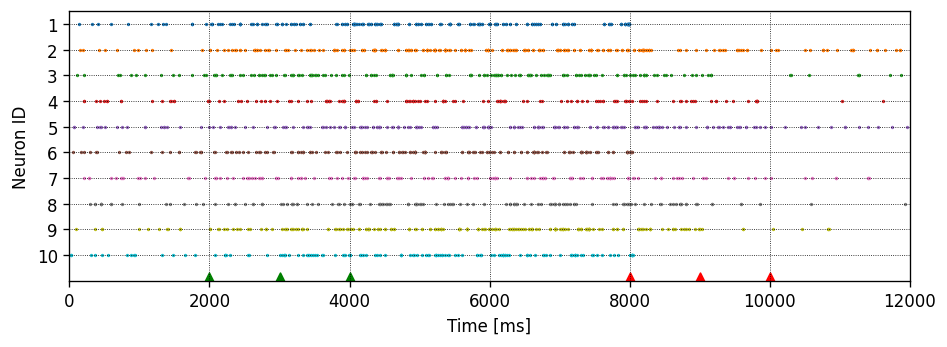

In [10]:
# Plot the spiking activity phi 1
import matplotlib as mpl

mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.linewidth'] = 0.5
mpl.rcParams['figure.dpi'] = 120
mpl.rcParams['figure.figsize'] = [8., 3.]
plot_spiking_activity(neuron_spike_times, pos_dopa_spike_times, neg_dopa_spike_times, source_ids, sim_time)
# plt.savefig("plots/stdp_spiking_aplus_low.png")

In [11]:
import matplotlib as mpl

mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.linewidth'] = 0.5
mpl.rcParams['figure.dpi'] = 120
mpl.rcParams['figure.figsize'] = [10., 4.]

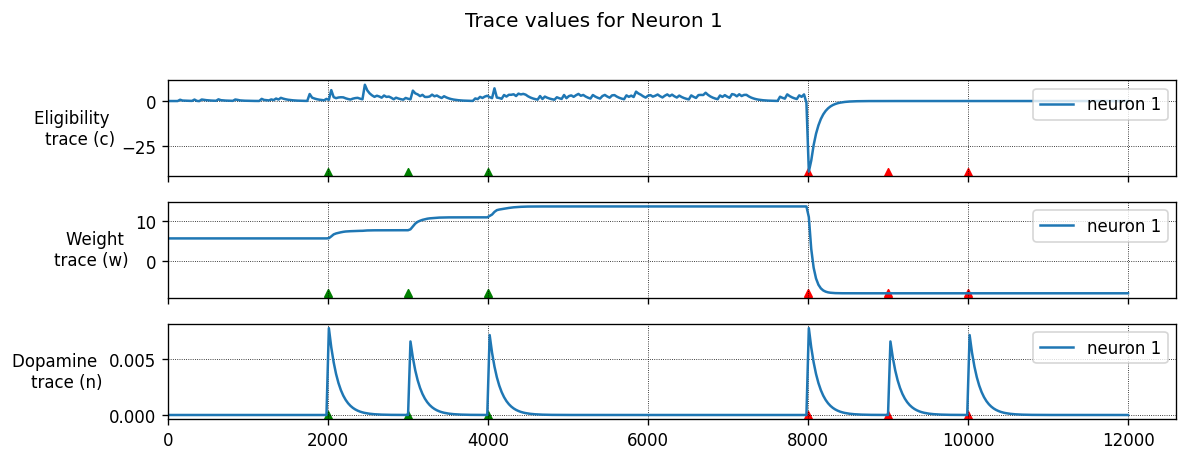

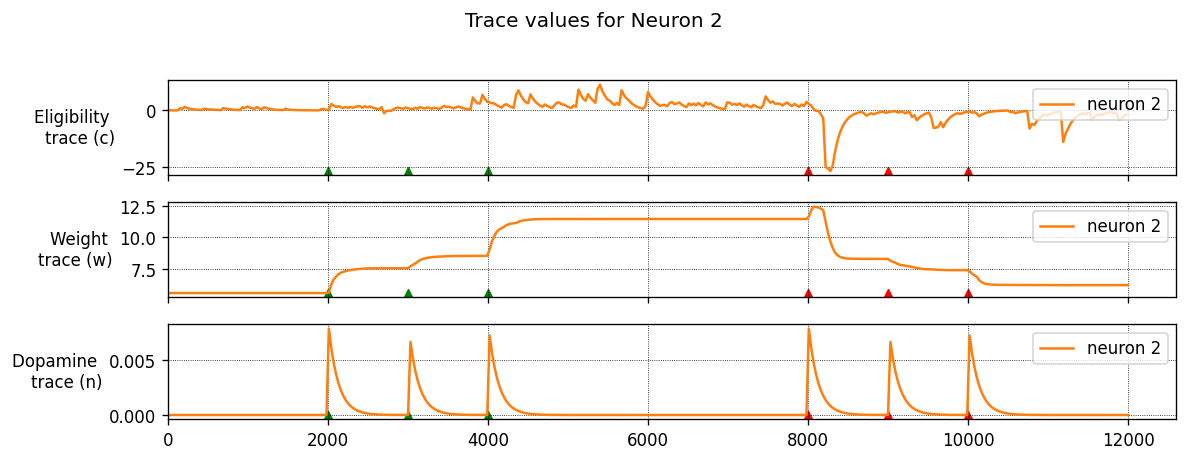

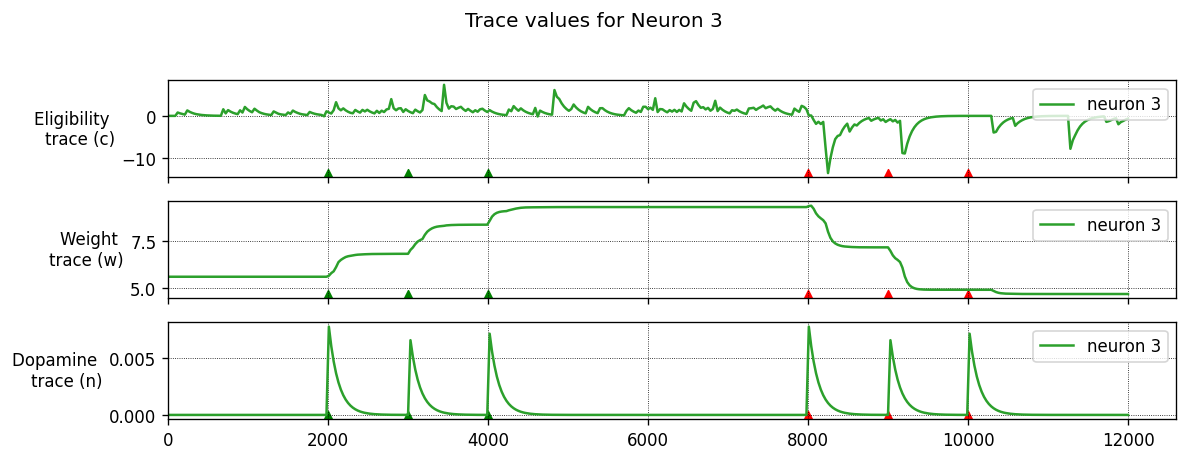

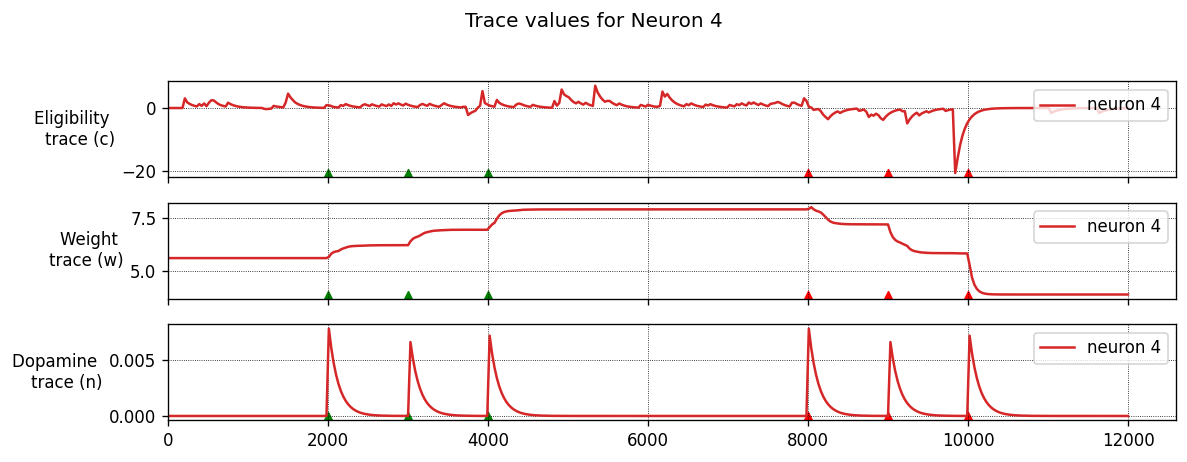

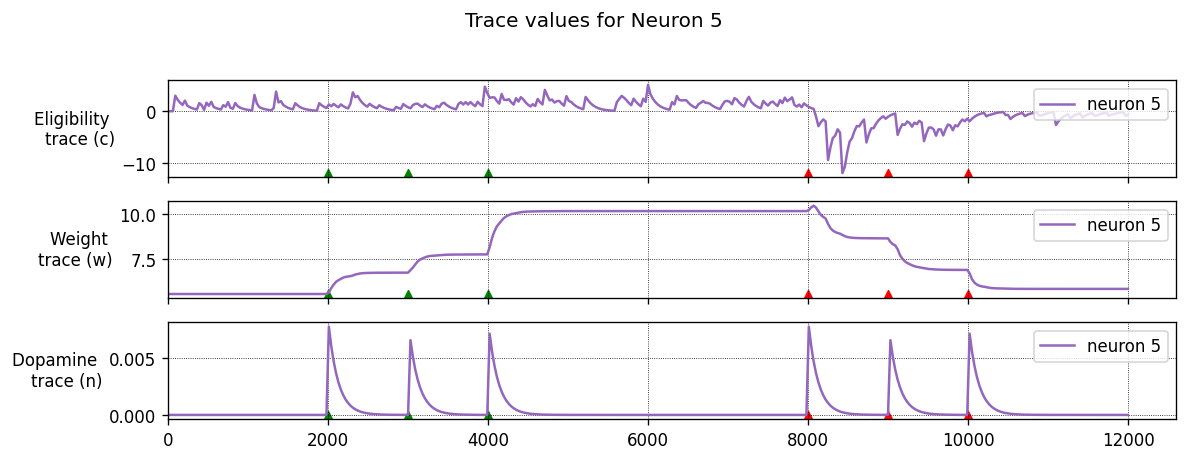

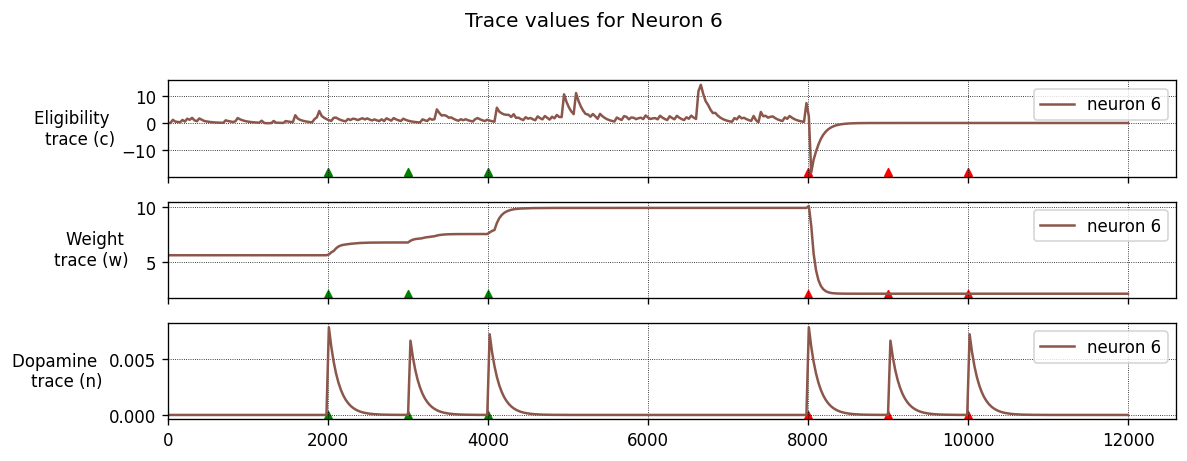

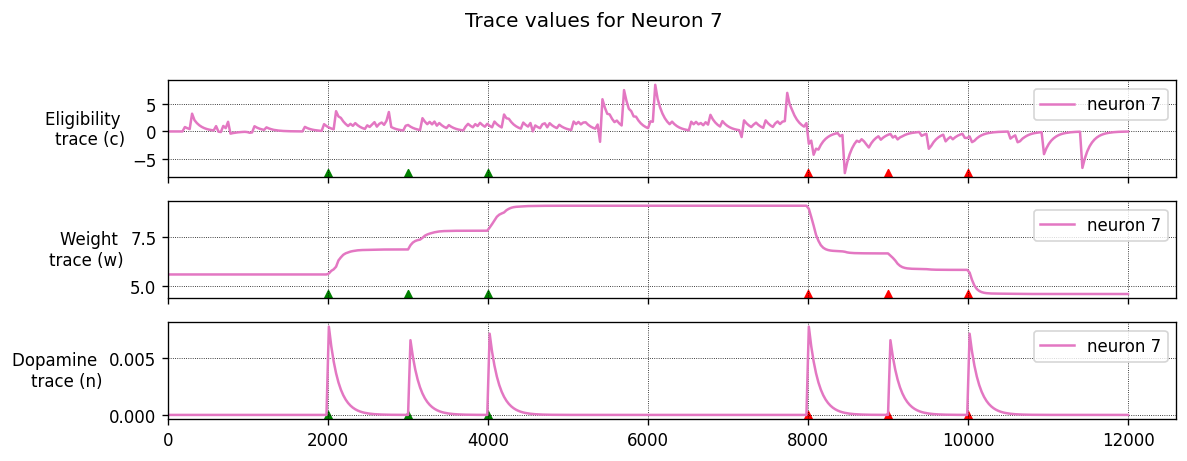

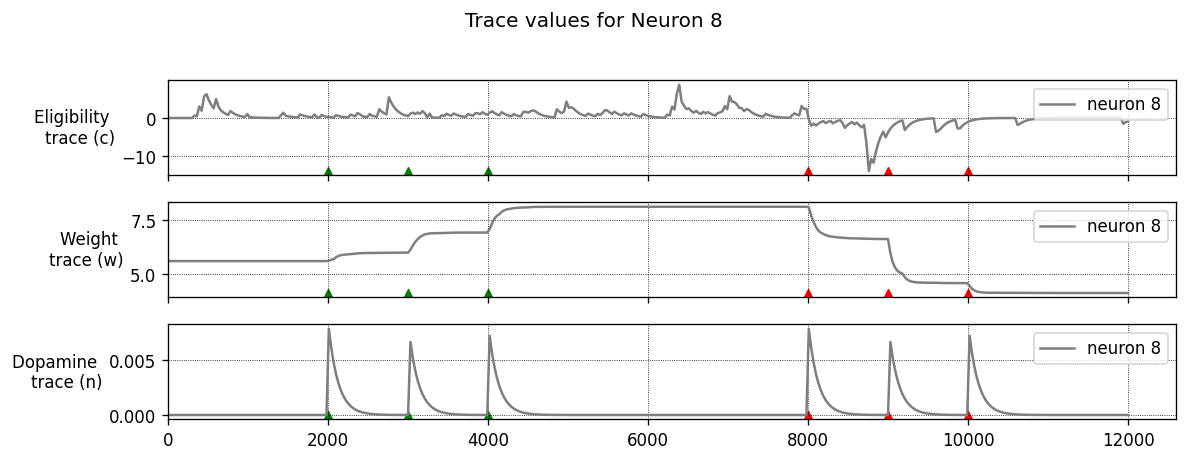

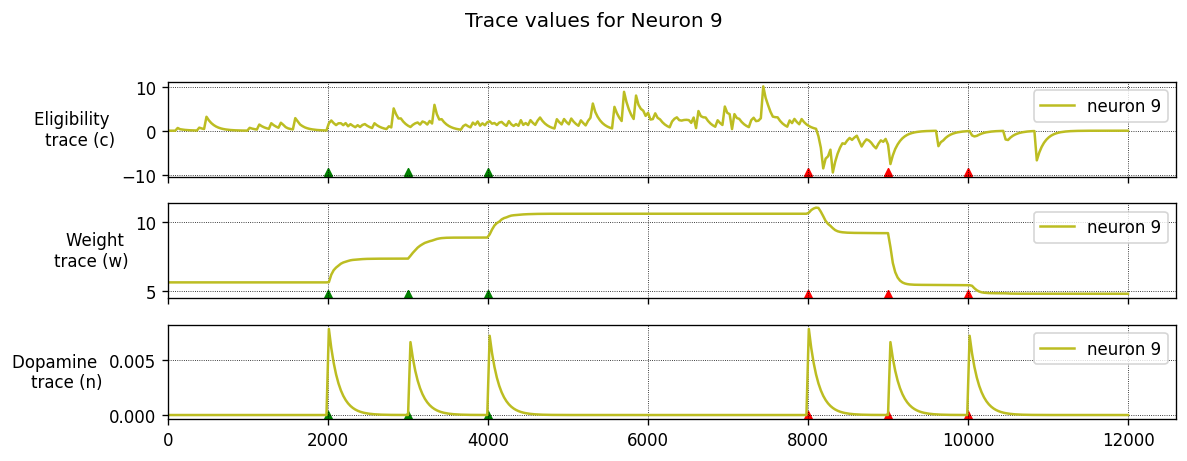

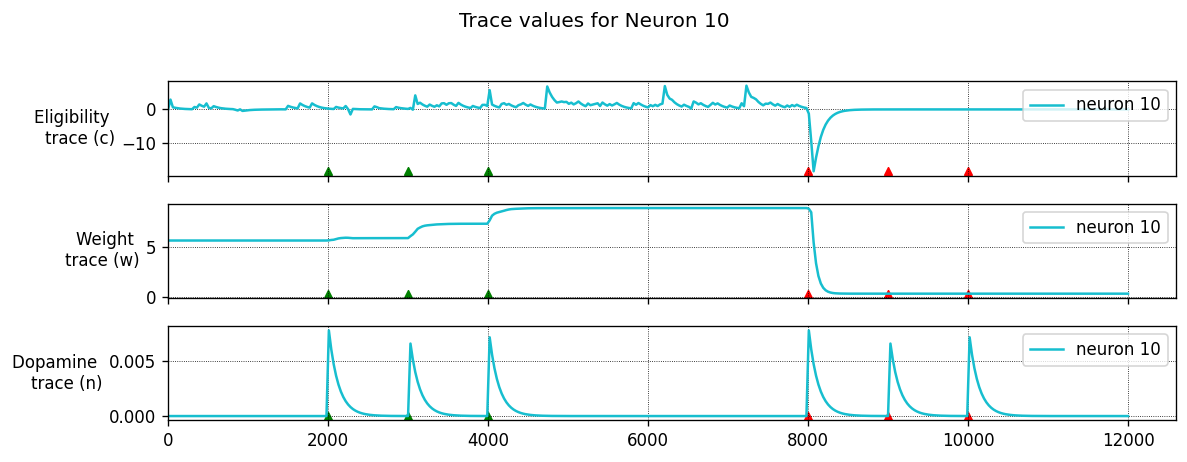

In [12]:
# Plot trace values for all neurons
plot_traces_for_neuron(log, ["c", "weight", "n"], pos_dopa_spike_times=pos_dopa_spike_times, neg_dopa_spike_times=neg_dopa_spike_times)

In [9]:
# Run simulation
sim_time = 12000
n_chunks = 400
recordables = ["c", "n", "weight"]
log = run_simulation_in_chunks(n_chunks, sim_time, recordables, neurons)

times = spike_rec.get("events")["times"]
senders = spike_rec.get("events")["senders"]

times_vt = spike_rec_vt.get("events")["times"]

connections = nest.GetConnections(neurons)
source_ids = connections.get("source")  # source IDs of all neurons
source_ids = list(set(source_ids))

neuron_spike_times = [[] for _ in range(n_neurons)]
for i in range(n_neurons):
    neuron_spike_times[i] = times[senders == source_ids[i]]

n [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
n [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
n [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Dec 12 20:36:32 NodeManager::prepare_nodes [Info]: 
    Preparing n [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
n [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
n [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
n [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
47 nodes for simulation.

Dec 12 20:36:32 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 47
    Simulation time (ms): 30
    Number of OpenMP threads: 1
    Not using MPI

Dec 12 20:36:32 SimulationManager::run [Info]: 
    Simulation finished.

Dec 12 20:36:32 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 47
    Simulation time (ms): 30
    Number of OpenMP threads: 1
    Not using MPI

Dec 12 20:36:32 SimulationManager::run [Info]: 
    Simulation finished.

Dec 12 20:36:32 SimulationManager::start_updatin